In [130]:
# ============================================================================ #
#        PRE-ANALYSIS: INTENSITY/VOLUME of TWITTER COMMUNCIATION               #
# ============================================================================ #

#NOTE## use raw data file (with all columns/variables), thereby keeping hyperlinks, hashtags, mentions etc.
#task A: TWEET-level (pre)analysis incl. twitter metrics (≠ B: USER-LEVEL)


#1## LOADING LIBRARIES/PACKAGES

#load inspection, formatting, and data (e.g. temporal) manipulation tools
import os
import glob
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import calendar

#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

#import graphing libraries
import matplotlib
import seaborn as sns   #for prettying up matplotlib graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import*        #necessary of xticks option etc


%matplotlib inline
mpl.style.available

#to have bigger default plots
plt.rcParams['figure.figsize'] = (15, 5)

In [131]:
tweet_file_path = '../data/account_tweets/'
all_tweet_files = glob.glob(os.path.join(tweet_file_path, "*.csv"))

In [132]:
reply_file_path = '../data/replies/'
all_replies_files = glob.glob(os.path.join(reply_file_path, "*.csv"))

In [133]:
df_IVCT = pd.concat((pd.read_csv(f) for f in all_tweet_files), ignore_index=True)
df_IVCR = pd.concat((pd.read_csv(f) for f in all_replies_files), ignore_index=True)

In [104]:
df_IVCT.head(10)

,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087414553...,conv_id: 560874145530257408,NaN,2015-01-29 18:56:31+00:00,http://t.co/VykfVY6GJy,False,zxx,53,48,0
1,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087376259...,conv_id: 560873762594516992,NaN,2015-01-29 18:55:00+00:00,Já está disponível a versão mobile do site da ...,False,pt,21,13,0
2,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064506410...,conv_id: 560645064108810240,NaN,2015-01-29 03:46:14+00:00,RT @AlanMansur: Hotsite do #MPF sobre as apura...,True,pt,24,0,0
3,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064311535...,conv_id: 560643115359674370,NaN,2015-01-29 03:38:29+00:00,RT @HelioTelho: Frederico Vasconcelos: Força-t...,True,pt,6,0,0
4,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064215249...,conv_id: 560642152494272512,NaN,2015-01-29 03:34:40+00:00,RT @WSarai: #MPF: empreiteiras não são vítimas...,True,pt,33,0,0
5,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064185484...,conv_id: 560641854845489152,NaN,2015-01-29 03:33:29+00:00,RT @AlanMansur: Procurador Deltan Dallagnol @d...,True,pt,15,0,0
6,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/55439765095...,conv_id: 554397650955808768,NaN,2015-01-11 22:01:14+00:00,RT @HelioTelho: “@AiltonBenedito: Em nove mese...,True,pt,5,0,0
7,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/55230967949...,conv_id: 552097779338985473,NaN,2015-01-06 03:44:23+00:00,"@wanderleyfjr Se preferir, manda um e-mail par...",False,pt,0,0,0
8,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/55230753722...,conv_id: 552097779338985473,NaN,2015-01-06 03:35:52+00:00,@wanderleyfjr Me passa seu email ou telefone d...,False,pt,0,0,0
9,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087414553...,conv_id: 560874145530257408,NaN,2015-01-29 18:56:31+00:00,http://t.co/VykfVY6GJy,False,zxx,53,48,0


In [105]:
df_IVCR.head(10)

,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0
5,https://twitter.com/i/user/30063082,arthursouza,2009-04-09 20:44:07+00:00,361,515,False,https://twitter.com/twitter/status/11457535888...,conv_id: 424178487730397184,NaN,2019-07-01 17:58:37+00:00,@PATRlOTAS @deltanmd @MoniqueCheker Pelo jeito...,False,pt,0,0,0
6,https://twitter.com/i/user/62891971,jomarlov,2009-08-04 18:38:11+00:00,879,372,False,https://twitter.com/twitter/status/11457292575...,conv_id: 424178487730397184,NaN,2019-07-01 16:21:56+00:00,@Pollima36 @mivagodet @deltanmd @ggreenwald @M...,False,pt,0,0,0
7,https://twitter.com/i/user/62891971,jomarlov,2009-08-04 18:38:11+00:00,879,372,False,https://twitter.com/twitter/status/11457292097...,conv_id: 424178487730397184,NaN,2019-07-01 16:21:44+00:00,@mamysdopedro @mivagodet @deltanmd @MoniqueChe...,False,pt,0,0,0
8,https://twitter.com/i/user/62891971,jomarlov,2009-08-04 18:38:11+00:00,879,372,False,https://twitter.com/twitter/status/11457291210...,conv_id: 424178487730397184,NaN,2019-07-01 16:21:23+00:00,@lelispatricia @mivagodet @deltanmd @MoniqueCh...,False,pt,0,0,0
9,https://twitter.com/i/user/62891971,jomarlov,2009-08-04 18:38:11+00:00,879,372,False,https://twitter.com/twitter/status/11457287014...,conv_id: 424178487730397184,NaN,2019-07-01 16:19:43+00:00,@rafaelcaptiosus @mivagodet @deltanmd @Monique...,False,pt,0,0,0


In [134]:
## Step 1: Text Matching
# For hyperlinks
df_IVCT['hyperlink'] = df_IVCT['tweet_text'].str.contains(r'http\S+', na=False).astype(float)
df_IVCR['hyperlink'] = df_IVCR['tweet_text'].str.contains(r'http\S+', na=False).astype(float)

# For mentions
df_IVCT['mention'] = df_IVCT['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)
df_IVCR['mention'] = df_IVCR['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)

# For hashtags
df_IVCT['hashtag'] = df_IVCT['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)
df_IVCR['hashtag'] = df_IVCR['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)

## Step 2: Convert to Numerical Format (You don't need to repeat these conversions)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT.columns))
print("# of tweets in df_IVCT:", len(df_IVCT))
df_IVCT.head()

In [138]:
print("# of variables in df_IVCR:", len(df_IVCR.columns))
print("# of tweets in df_IVCR:", len(df_IVCR))
df_IVCR.head()

# of variables in df_IVCR: 19
# of tweets in df_IVCR: 22796


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.00,1.00,0.00
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.00,1.00,0.00
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.00,1.00,0.00
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.00,1.00,0.00
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.00,1.00,0.00


In [139]:
##Generating dummy/binary variables from numerical data: RTs_dummy from retweet_count, likes_dummy from like_count
# For retweets
df_IVCT['RTs_dummy_IVCT'] = np.where(df_IVCT['retweet_count'] == 0, 0, 1)   #there is already a is_retweet dummy in the DF - scrap this?!
df_IVCR['RTs_dummy_IVCR'] = np.where(df_IVCR['retweet_count'] == 0, 0, 1)

# For likes
df_IVCT['likes_dummy_IVCT'] = np.where(df_IVCT['like_count'] == 0, 0, 1)
df_IVCR['likes_dummy_IVCR'] = np.where(df_IVCR['like_count'] == 0, 0, 1)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT.columns))
print("# of tweets in df_IVCT:", len(df_IVCT))
df_IVCT.head()

print("# of variables in df_IVCR:", len(df_IVCR.columns))
print("# of tweets in df_IVCR:", len(df_IVCR))
df_IVCR.head()

# of variables in df_IVCT: 21
# of tweets in df_IVCT: 786
# of variables in df_IVCR: 21
# of tweets in df_IVCR: 22796


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.00,1.00,0.00,0,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.00,1.00,0.00,0,0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.00,1.00,0.00,0,1
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.00,1.00,0.00,0,0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.00,1.00,0.00,0,0


In [140]:
##Generating binary variables indicating whether Tweets contain  hyperlink(s), mention(s) or hashtag(s) (>=1)
# For hashtags in 'df_IVCT'
df_IVCT['hashtags_dummy_IVCT'] = np.where(df_IVCT['hashtag'] == 0, 0, 1)

# For mentions in 'df_IVCT'
df_IVCT['mentions_dummy_IVCT'] = np.where(df_IVCT['mention'] == 0, 0, 1)

# For hyperlinks in 'df_IVCT'
df_IVCT['hyperlinks_dummy_IVCT'] = np.where(df_IVCT['hyperlink'] == 0, 0, 1)

# For hashtags in 'df_IVCR'
df_IVCR['hashtags_dummy_IVCR'] = np.where(df_IVCR['hashtag'] == 0, 0, 1)

# For mentions in 'df_IVCR'
df_IVCR['mentions_dummy_IVCR'] = np.where(df_IVCR['mention'] == 0, 0, 1)

# For hyperlinks in 'df_IVCR'
df_IVCR['hyperlinks_dummy_IVCR'] = np.where(df_IVCR['hyperlink'] == 0, 0, 1)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT.columns))
print("# of tweets in df_IVCT:", len(df_IVCT))
df_IVCT.head()

# of variables in df_IVCT: 24
# of tweets in df_IVCT: 786


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCT,likes_dummy_IVCT,hashtags_dummy_IVCT,mentions_dummy_IVCT,hyperlinks_dummy_IVCT
0,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087414553...,conv_id: 560874145530257408,NaN,2015-01-29 18:56:31+00:00,http://t.co/VykfVY6GJy,False,zxx,53,48,0,1.00,0.00,0.00,1,1,0,0,1
1,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087376259...,conv_id: 560873762594516992,NaN,2015-01-29 18:55:00+00:00,Já está disponível a versão mobile do site da ...,False,pt,21,13,0,1.00,0.00,0.00,1,1,0,0,1
2,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064506410...,conv_id: 560645064108810240,NaN,2015-01-29 03:46:14+00:00,RT @AlanMansur: Hotsite do #MPF sobre as apura...,True,pt,24,0,0,1.00,1.00,1.00,1,0,1,1,1
3,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064311535...,conv_id: 560643115359674370,NaN,2015-01-29 03:38:29+00:00,RT @HelioTelho: Frederico Vasconcelos: Força-t...,True,pt,6,0,0,1.00,1.00,1.00,1,0,1,1,1
4,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56064215249...,conv_id: 560642152494272512,NaN,2015-01-29 03:34:40+00:00,RT @WSarai: #MPF: empreiteiras não são vítimas...,True,pt,33,0,0,1.00,1.00,1.00,1,0,1,1,1


In [141]:
print("# of variables in df_IVCR:", len(df_IVCR.columns))
print("# of tweets in df_IVCR:", len(df_IVCR))
df_IVCR.head()

# of variables in df_IVCR: 24
# of tweets in df_IVCR: 22796


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR,hashtags_dummy_IVCR,mentions_dummy_IVCR,hyperlinks_dummy_IVCR
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.00,1.00,0.00,0,1,0,1,0
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.00,1.00,0.00,0,0,0,1,1


In [142]:
##VERIFICATION of data transformation

# Value counts for 'hyperlinks_dummy_IVCT'
print("Value counts for 'hyperlinks_dummy_IVCT':")
print(df_IVCT['hyperlinks_dummy_IVCT'].value_counts())

# Value counts for 'mentions_dummy_IVCT'
print("Value counts for 'mentions_dummy_IVCT':")
print(df_IVCT['mentions_dummy_IVCT'].value_counts())

# Value counts for 'hashtags_dummy_IVCT'
print("Value counts for 'hashtags_dummy_IVCT':")
print(df_IVCT['hashtags_dummy_IVCT'].value_counts())
# For the counts of hashtags, mentions, and hyperlinks:

# Value counts for 'hashtags_count_IVCT'
# print("Value counts for 'hashtags_count_IVCT':")
# print(df_IVCT['hashtags_count_IVCT'].value_counts())

# # Value counts for 'mentions_count_IVCT'
# print("Value counts for 'mentions_count_IVCT':")
# print(df_IVCT['mentions_count_IVCT'].value_counts())

# # Value counts for 'hyperlinks_count_IVCT'
# print("Value counts for 'hyperlinks_count_IVCT':")
# print(df_IVCT['hyperlinks_count_IVCT'].value_counts())

#save new DFs
#df.to_pickle('df_IVCT_transformed_.pkl')

Value counts for 'hyperlinks_dummy_IVCT':
1    632
0    154
Name: hyperlinks_dummy_IVCT, dtype: int64
Value counts for 'mentions_dummy_IVCT':
0    500
1    286
Name: mentions_dummy_IVCT, dtype: int64
Value counts for 'hashtags_dummy_IVCT':
0    604
1    182
Name: hashtags_dummy_IVCT, dtype: int64


In [115]:
#5##COMPUTING DESCRIPTIVE SUMMARY STATISTICS (to get a feel about range and dispersion of data)

# Set options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# user_page	username
# user_created_at
# user_followers
# user_followings	verified_user	tweet_url	conv_id	user_country	tweet_created_at	tweet_text	is_retweet	tweet_lang	retweet_count	like_count	quote_count	hyperlink	mention	hashtag
# Subset the columns of interest in df_IVCT
df_IVCT_summary = df_IVCT[['user_followers', 'conv_id', 'tweet_created_at', 'tweet_text', 'is_retweet', 'tweet_lang', 'retweet_count', 'like_count', 'quote_count']]

# Print the number of variables and tweets in df_IVCT
print("# of variables in df_IVCT:", len(df_IVCT_summary.columns))
print("# of tweets in df_IVCT:", len(df_IVCT_summary))

# Display the first 2 rows of df_IVCT_summary
df_IVCT_summary.head(2)

# of variables in df_IVCT: 9
# of tweets in df_IVCT: 786


,user_followers,conv_id,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,1734901,conv_id: 560874145530257408,2015-01-29 18:56:31+00:00,http://t.co/VykfVY6GJy,False,zxx,53,48,0
1,1734901,conv_id: 560873762594516992,2015-01-29 18:55:00+00:00,Já está disponível a versão mobile do site da ...,False,pt,21,13,0


In [145]:
# Subset the columns of interest in df_IVCR
df_IVCR_summary = df_IVCR[['user_page', 'user_followers', 'conv_id', 'tweet_created_at', 'tweet_text', 'is_retweet', 'tweet_lang', 'retweet_count', 'like_count', 'quote_count']]

# Print the number of variables and tweets in df_IVCR
print("# of variables in df_IVCR:", len(df_IVCR_summary.columns))
print("# of tweets in df_IVCR:", len(df_IVCR_summary))

# Display the first 2 rows of df_IVCR_summary
df_IVCR_summary.head(2)

# Generate summary statistics for each variable
summary_IVCT = np.round(df_IVCT_summary.describe(), 2)
summary_IVCR = np.round(df_IVCR_summary.describe(), 2)

# Transpose the summary statistics for better representation
summary_IVCT = summary_IVCT.T[['count', 'mean', 'std', 'min', 'max']]
summary_IVCR = summary_IVCR.T[['count', 'mean', 'std', 'min', 'max']]

# Save the summary statistics to a CSV file
summary_IVCT.to_csv('summary_stats_IVCT.csv', sep=',')
summary_IVCR.to_csv('summary_stats_IVCR.csv', sep=',')

#df.describe().transpose()[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')  #selecting variables/columns of interest
#np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',') #with only 2 decimals


# of variables in df_IVCR: 10
# of tweets in df_IVCR: 22796


In [117]:
#3.1## FURTHER TASK-SPECIFIC MANIPULATION AND AGGREGATION: I&V of communication over time & I&V of reaction over time
#NOTE: furthwer CSV file formatting for noise removal (by getting rid of irrelevant columns/variables)

###IVCT
# df_IVCT.columns

# Drop unneeded columns 
# df_IVCT = df_IVCT.drop(['user_page', 'username', 'user_followers', 'user_followings', 'tweet_url', 'user_country'], axis=1)

# Convert 'tweet_created' to datetime
df_IVCT['tweet_created_at'] = pd.to_datetime(df_IVCT['tweet_created_at'])

# Set 'tweet_created' as the index
df_IVCT = df_IVCT.set_index('tweet_created_at')

# Check data types
print(df_IVCT.dtypes)
df_IVCT.head(2)

user_page                 object
username                  object
user_created_at           object
user_followers             int64
user_followings            int64
verified_user               bool
tweet_url                 object
conv_id                   object
user_country             float64
tweet_text                object
is_retweet                  bool
tweet_lang                object
retweet_count              int64
like_count                 int64
quote_count                int64
hyperlink                float64
mention                  float64
hashtag                  float64
RTs_dummy_IVCT             int64
likes_dummy_IVCT           int64
hashtags_dummy_IVCT        int64
mentions_dummy_IVCT        int64
hyperlinks_dummy_IVCT      int64
dtype: object


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCT,likes_dummy_IVCT,hashtags_dummy_IVCT,mentions_dummy_IVCT,hyperlinks_dummy_IVCT
tweet_created_at,,,,,,,,,,,,,,,,,,,,,,,
2015-01-29 18:56:31+00:00,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087414553...,conv_id: 560874145530257408,NaN,http://t.co/VykfVY6GJy,False,zxx,53,48,0,1.00,0.00,0.00,1,1,0,0,1
2015-01-29 18:55:00+00:00,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734901,1125,True,https://twitter.com/twitter/status/56087376259...,conv_id: 560873762594516992,NaN,Já está disponível a versão mobile do site da ...,False,pt,21,13,0,1.00,0.00,0.00,1,1,0,0,1


In [146]:
###IVCR

# Drop unneeded columns
df_IVCR = df_IVCR.drop(['username', 'user_followings', 'tweet_url', 'user_country'], axis=1)

# Convert 'tweet_created' to datetime
df_IVCR['tweet_created_at'] = pd.to_datetime(df_IVCR['tweet_created_at'])

# Set 'tweet_created' as the index
df_IVCR = df_IVCR.set_index('tweet_created_at')

# Check data types
print(df_IVCR.dtypes)
df_IVCR.head(2)

user_page                 object
user_created_at           object
user_followers             int64
verified_user               bool
conv_id                   object
tweet_text                object
is_retweet                  bool
tweet_lang                object
retweet_count              int64
like_count                 int64
quote_count                int64
hyperlink                float64
mention                  float64
hashtag                  float64
RTs_dummy_IVCR             int64
likes_dummy_IVCR           int64
hashtags_dummy_IVCR        int64
mentions_dummy_IVCR        int64
hyperlinks_dummy_IVCR      int64
dtype: object


,user_page,user_created_at,user_followers,verified_user,conv_id,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR,hashtags_dummy_IVCR,mentions_dummy_IVCR,hyperlinks_dummy_IVCR
tweet_created_at,,,,,,,,,,,,,,,,,,,
2019-07-01 23:51:21+00:00,https://twitter.com/i/user/65052308,2009-08-12 14:43:27+00:00,1181,False,conv_id: 424178487730397184,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0
2019-07-01 20:58:09+00:00,https://twitter.com/i/user/191640915,2010-09-16 23:40:43+00:00,690,False,conv_id: 424178487730397184,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0


In [148]:
# ============================================================================ #
#          IV = INTENSITY/VOLUME OF COMMUNICATION (IVCT OVER TIME)             #
# ============================================================================ #

#6## GENERATE PLOT NUMBER OF TWEETS OVER TIME (MONTHLY)

from pandas import Series

def f(x):
    return Series({'no_tweets': x['tweet_text'].count()})

daily_count_IVCT = df_IVCT.groupby(df_IVCT.index.date).apply(f)
daily_count_IVCR = df_IVCR.groupby(df_IVCR.index.date).apply(f)

daily_count_IVCT.index = pd.to_datetime(daily_count_IVCT.index)  # Convert the index to datetime
daily_count_IVCR.index = pd.to_datetime(daily_count_IVCR.index)

daily_count_IVCT.index.name = 'date'
daily_count_IVCR.index.name = 'date'

#monthly aggregation/plotting
## HOW TO SPECIFY THE YEAR - OTHER THAN INDEXING?
monthly_count_IVCT = df_IVCT.groupby(df_IVCT.index.month).apply(f)
monthly_count_IVCR = df_IVCR.groupby(df_IVCR.index.month).apply(f)




AttributeError: 'RangeIndex' object has no attribute 'date'

In [ ]:
### append the year to each month label (for cycling through the years as needed)

# Assuming you already have monthly_count_IVCT and monthly_count_IVCR DataFrames

# Create subplots with two rows and one column
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# List of years for your data
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Plot monthly counts for IVCT
monthly_count_IVCT['no_tweets'].plot(kind='bar', ax=ax[0], title="Monthly Counts for IVCT")
ax[0].set_xticks(range(len(months)))
ax[0].set_xticklabels([f"{months[i]} {years[i % len(years)]}" for i in range(len(months))], rotation=0)
ax[0].set_xlabel('Month of the Year')
ax[0].set_ylabel('# Tweets (Messages)')

# Plot monthly counts for IVCR
monthly_count_IVCR['no_tweets'].plot(kind='bar', ax=ax[1], title="Monthly Counts for IVCR")
ax[1].set_xticks(range(len(months)))
ax[1].set_xticklabels([f"{months[i]} {years[i % len(years)]}" for i in range(len(months))], rotation=0)
ax[1].set_xlabel('Month of the Year')
ax[1].set_ylabel('# Tweets (Messages)')

# Adjust spacing between subplots
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_monthly_counts.png', bbox_inches='tight', dpi=300, format='png')

# Show the plot
plt.show()

In [ ]:
### creating subplots

# Assuming you already have monthly_count_IVCT and monthly_count_IVCR DataFrames

# Create subplots with two rows and one column
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot monthly counts for IVCT
monthly_count_IVCT['no_tweets'].plot(kind='bar', ax=ax[0], title="Monthly Counts for IVCT")
ax[0].set_xticks(range(12))
ax[0].set_xticklabels(months, rotation=0)
ax[0].set_xlabel('Month of the Year')
ax[0].set_ylabel('# Tweets (Messages)')

# Plot monthly counts for IVCR
monthly_count_IVCR['no_tweets'].plot(kind='bar', ax=ax[1], title="Monthly Counts for IVCR")
ax[1].set_xticks(range(12))
ax[1].set_xticklabels(months, rotation=0)
ax[1].set_xlabel('Month of the Year')
ax[1].set_ylabel('# Tweets (Messages)')

# Adjust spacing between subplots
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_monthly_counts.png', bbox_inches='tight', dpi=300, format='png')

# Show the plot
plt.show()


AttributeError: 'NoneType' object has no attribute 'remove'

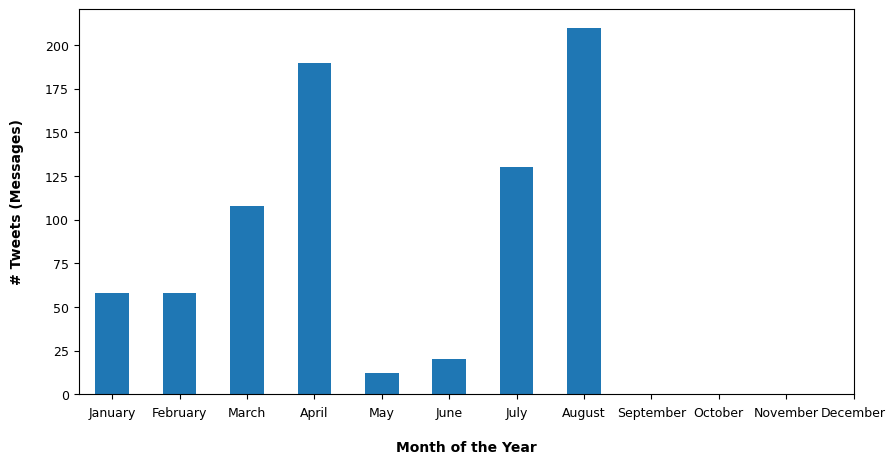

In [124]:
##WAY TO SPECIFY YEAR - OTHER THAN BY INDEXING? 

# Plot monthly counts for IVCT
monthly_plot_IVCT = monthly_count_IVCT['no_tweets'].plot(kind='bar', figsize=(10, 5))
months = list(calendar.month_name[1:])
plt.xticks(np.arange(12), months, rotation=0, fontsize=9)
monthly_plot_IVCT.set_xlabel('Month of the Year', weight='bold', labelpad=15)
monthly_plot_IVCT.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15)
plt.xticks(fontsize=9, rotation=0, ha="center")
plt.yticks(fontsize=9)
monthly_plot_IVCT.tick_params(axis='x', pad=5)
monthly_plot_IVCT.legend_.remove()  # To remove the legend

plt.savefig('monthly_counts_IVCT.png', bbox_inches='tight', dpi=300, format='png')

AttributeError: 'NoneType' object has no attribute 'remove'

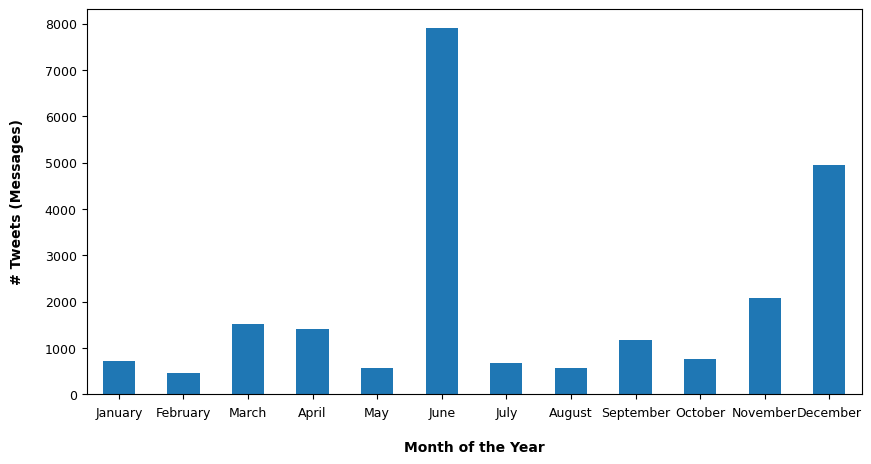

In [125]:

# Plot monthly counts for IVCR
monthly_plot_IVCR = monthly_count_IVCR['no_tweets'].plot(kind='bar', figsize=(10, 5))
plt.xticks(np.arange(12), months, rotation=0, fontsize=9)
monthly_plot_IVCR.set_xlabel('Month of the Year', weight='bold', labelpad=15)
monthly_plot_IVCR.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15)
plt.xticks(fontsize=9, rotation=0, ha="center")
plt.yticks(fontsize=9)
monthly_plot_IVCR.tick_params(axis='x', pad=5)
monthly_plot_IVCR.legend_.remove()

plt.savefig('monthly_counts_IVCR.png', bbox_inches='tight', dpi=300, format='png')

               count  mean    std  min   25%   50%   75%     max
retweet_count 786.00 96.35 383.63 0.00 18.00 45.00 83.00 6937.00
like_count    786.00 69.57 340.78 0.00  0.00 27.00 73.00 6479.00
quote_count   786.00  2.56  27.53 0.00  0.00  0.00  0.00  422.00
Correlation between Likes and Retweets: 0.8975949202094996


<AxesSubplot:title={'center':'Likes vs. Retweets'}, xlabel='like_count', ylabel='retweet_count'>

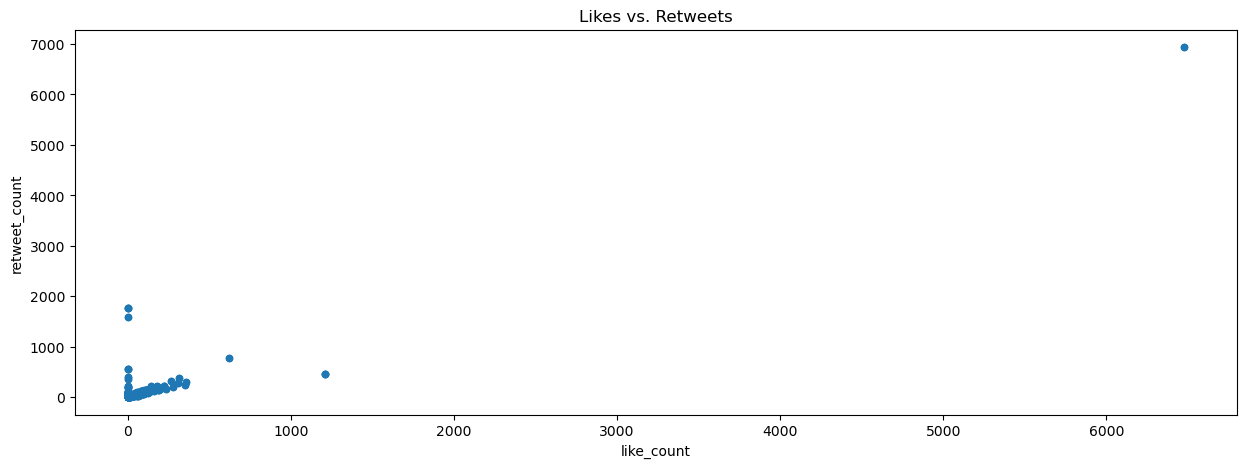

In [127]:
# ============================================================================ #
#       DV = INTENSITY/VOLUME OF REACTIONS (& TW METRICS)(OVER TIME)           #
# ============================================================================ #

#7## 'DIRECT' REACTIONS (using df_IVCT): TW METRICS - in direct response to Tweets

# Get descriptive statistics for retweets, likes, and quotes
likes_retweets_quotes_stats = df_IVCT[['retweet_count', 'like_count', 'quote_count']].describe().T
print(likes_retweets_quotes_stats)

# Calculate the correlation between likes and retweets
likes_retweets_corr = df_IVCT['retweet_count'].corr(df_IVCT['like_count'])
print("Correlation between Likes and Retweets:", likes_retweets_corr)

# Create a scatter plot of likes vs. retweets
df_IVCT.plot(kind='scatter', x='like_count', y='retweet_count', title="Likes vs. Retweets")

Frequency counts for Likes:
0       248
1        20
37       14
23       12
50       12
       ... 
352       2
194       2
220       2
109       2
1210      2
Name: like_count, Length: 129, dtype: int64
Top 10 Like Counts with Percentages:
0    0.32
1    0.03
37   0.02
23   0.02
50   0.02
73   0.01
70   0.01
83   0.01
90   0.01
3    0.01
Name: like_count, dtype: float64
Average Likes for Tweets with At Least One Like:
count    538.00
mean     101.64
std      408.04
min        1.00
25%       25.00
50%       53.00
75%       90.00
max     6479.00
Name: like_count, dtype: float64
Average Likes for Original Tweets with More Likes than Average Retweets:
count    120.00
mean     307.07
std      832.98
min       98.00
25%      114.25
50%      141.00
75%      189.50
max     6479.00
Name: like_count, dtype: float64


Text(0, 0.5, '# Likes')

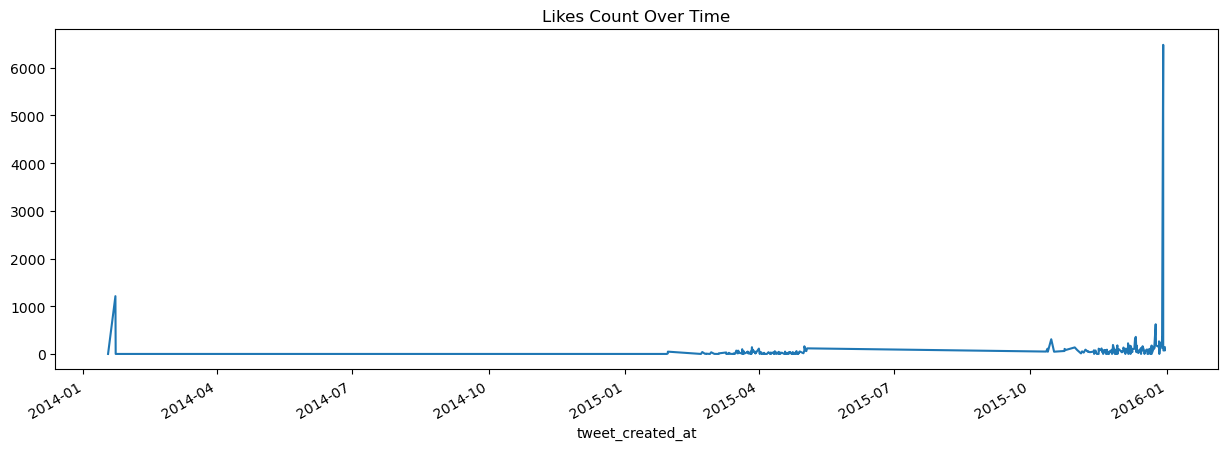

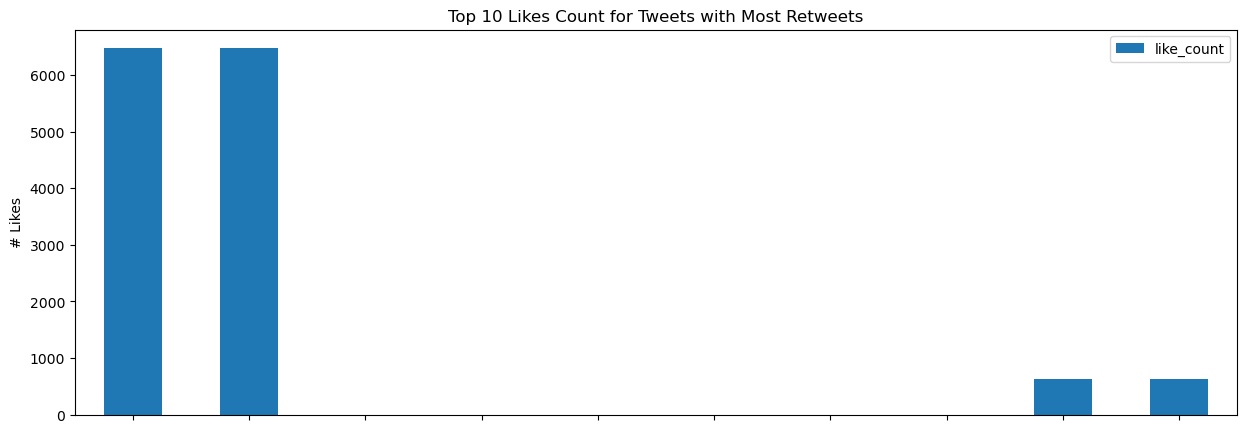

In [128]:

# Get frequency counts for likes
like_count_counts = df_IVCT['like_count'].value_counts()
print("Frequency counts for Likes:")
print(like_count_counts)

# Get the top 10 like counts with percentages
top_10_like_counts_percentage = df_IVCT['like_count'].value_counts(normalize=True)[:10]
print("Top 10 Like Counts with Percentages:")
print(top_10_like_counts_percentage)

# Get average likes for tweets with at least one like
average_likes_for_likes_gt_0 = df_IVCT[df_IVCT['like_count'] > 0]['like_count'].describe()
print("Average Likes for Tweets with At Least One Like:")
print(average_likes_for_likes_gt_0)

# Get average likes for original tweets with more likes than the average
average_likes_for_original_tweets = df_IVCT[df_IVCT['like_count'] > df_IVCT['retweet_count'].mean()]['like_count'].describe()
print("Average Likes for Original Tweets with More Likes than Average Retweets:")
print(average_likes_for_original_tweets)

# Plot the likes count
df_IVCT['like_count'].plot(kind='line', title="Likes Count Over Time")

# Sort the DataFrame by retweet_count and plot likes count
df_IVCT_sorted = df_IVCT.sort_values(by='retweet_count', ascending=False)
likes_bar_plot_IVCT = df_IVCT_sorted[['like_count']].head(10).plot(kind='bar', title="Top 10 Likes Count for Tweets with Most Retweets")
likes_bar_plot_IVCT.set_xticklabels('')
likes_bar_plot_IVCT.set_xlabel('')
likes_bar_plot_IVCT.set_ylabel('# Likes')

#NOTE: to see the skewed distribution more clearly, splitting up the df may be necexssary (e.g. year by year)

                 count  mean   std  min  25%  50%  75%    max
retweet_count 22796.00  0.80  6.99 0.00 0.00 0.00 0.00 224.00
like_count    22796.00  3.93 19.56 0.00 0.00 0.00 2.00 493.00
quote_count   22796.00  0.02  0.17 0.00 0.00 0.00 0.00   3.00
Correlation between Likes and Retweets (df_IVCR): 0.4911400072302414
Frequency counts for Likes in df_IVCR:
0      13044
1       3924
2       1548
3        876
4        656
       ...  
55         8
143        8
277        8
223        8
36         4
Name: like_count, Length: 68, dtype: int64
Top 10 Like Counts with Percentages in df_IVCR:
0   0.57
1   0.17
2   0.07
3   0.04
4   0.03
5   0.01
6   0.01
8   0.01
7   0.01
9   0.01
Name: like_count, dtype: float64
Average Likes for Tweets with At Least One Like (df_IVCR):
count   9752.00
mean       9.19
std       29.09
min        1.00
25%        1.00
50%        2.00
75%        6.00
max      493.00
Name: like_count, dtype: float64
Average Likes for Original Tweets with More Likes than Average Retw

Text(0, 0.5, '# Likes')

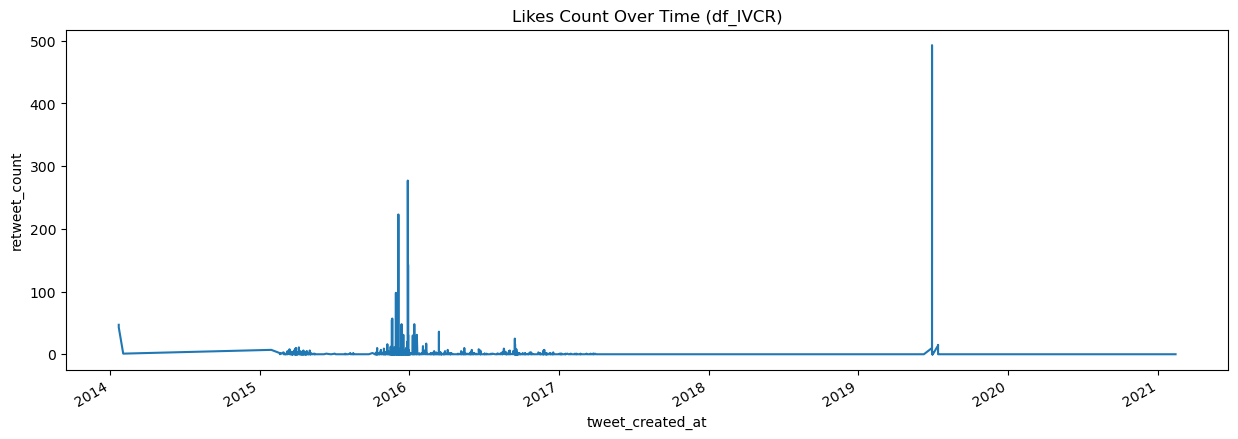

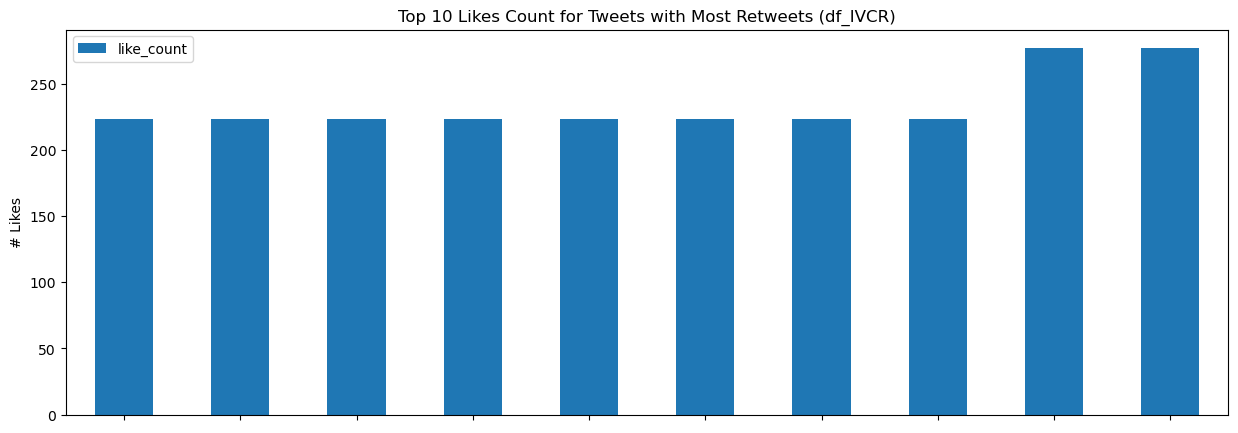

In [129]:
#8## 'INDIRECT' REACTIONS (using df_IVCR): TW metrics in indirect response, i.e. further reactions to Tweet replies/comments

##same as above, for df_IVCR

# Get descriptive statistics for retweets, likes, and quotes in df_IVCR
likes_retweets_quotes_stats_IVCR = df_IVCR[['retweet_count', 'like_count', 'quote_count']].describe().T
print(likes_retweets_quotes_stats_IVCR)

# Calculate the correlation between likes and retweets in df_IVCR
likes_retweets_corr_IVCR = df_IVCR['retweet_count'].corr(df_IVCR['like_count'])
print("Correlation between Likes and Retweets (df_IVCR):", likes_retweets_corr_IVCR)

# Create a scatter plot of likes vs. retweets in df_IVCR
df_IVCR.plot(kind='scatter', x='like_count', y='retweet_count', title="Likes vs. Retweets (df_IVCR)")

# Get frequency counts for likes in df_IVCR
like_count_counts_IVCR = df_IVCR['like_count'].value_counts()
print("Frequency counts for Likes in df_IVCR:")
print(like_count_counts_IVCR)

# Get the top 10 like counts with percentages in df_IVCR
top_10_like_counts_percentage_IVCR = df_IVCR['like_count'].value_counts(normalize=True)[:10]
print("Top 10 Like Counts with Percentages in df_IVCR:")
print(top_10_like_counts_percentage_IVCR)

# Get average likes for tweets with at least one like in df_IVCR
average_likes_for_likes_gt_0_IVCR = df_IVCR[df_IVCR['like_count'] > 0]['like_count'].describe()
print("Average Likes for Tweets with At Least One Like (df_IVCR):")
print(average_likes_for_likes_gt_0_IVCR)

# Get average likes for original tweets with more likes than the average in df_IVCR
average_likes_for_original_tweets_IVCR = df_IVCR[df_IVCR['like_count'] > df_IVCR['retweet_count'].mean()]['like_count'].describe()
print("Average Likes for Original Tweets with More Likes than Average Retweets (df_IVCR):")
print(average_likes_for_original_tweets_IVCR)

# Plot the likes count in df_IVCR
df_IVCR['like_count'].plot(kind='line', title="Likes Count Over Time (df_IVCR)")

# Sort the DataFrame by retweet_count and plot likes count in df_IVCR
df_IVCR_sorted = df_IVCR.sort_values(by='retweet_count', ascending=False)
likes_bar_plot_IVCR = df_IVCR_sorted[['like_count']].head(10).plot(kind='bar', title="Top 10 Likes Count for Tweets with Most Retweets (df_IVCR)")
likes_bar_plot_IVCR.set_xticklabels('')
likes_bar_plot_IVCR.set_xlabel('')
likes_bar_plot_IVCR.set_ylabel('# Likes')

In [ ]:
# ============================================================================ #
#                    # HASHTAG ETC (PRE-)ANALYSIS FROM IV/DV DATA              #
# ============================================================================ #

#NOTE: emprically, hashtags themselves can indicate... sentimiment expresssion (DV), the public mood/issue salience/attention (CV), or political ideology (confounder)
## --> this pre-analysis may yield the use of different hashtags, some of which may then be used as NLP model features later on
#again: consider getting rid of non-original tweets (=RTs)

#9## compute summary description of HT & plot it out

###NEED TO CREATE HASHTAG DICTIONARY FIRST: entities_hashtags
import re

# Define a function to extract hashtags from tweet text
def extract_hashtags(tweet_text):
    return re.findall(r'#\w+', tweet_text)

# Create a dictionary to count hashtags for IVCT
hashtags_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    hashtags = extract_hashtags(tweet_text)
    for hashtag in hashtags:
        if hashtag in hashtags_dict_IVCT:
            hashtags_dict_IVCT[hashtag] += 1
        else:
            hashtags_dict_IVCT[hashtag] = 1

# Print the count of each hashtag in IVCT
for hashtag, count in hashtags_dict_IVCT.items():
    print(f"{hashtag}: {count} times")

# Create a dictionary to count hashtags for IVCR
hashtags_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    hashtags = extract_hashtags(tweet_text)
    for hashtag in hashtags:
        if hashtag in hashtags_dict_IVCR:
            hashtags_dict_IVCR[hashtag] += 1
        else:
            hashtags_dict_IVCR[hashtag] = 1

# Print the count of each hashtag in IVCR
for hashtag, count in hashtags_dict_IVCR.items():
    print(f"{hashtag}: {count} times")

# List all the hashtags extracted from IVCT
for hashtag in hashtags_dict_IVCT.keys():
    print(hashtag)

# List all the hashtags extracted from IVCR
for hashtag in hashtags_dict_IVCR.keys():
    print(hashtag)

# Compute descriptive summaries for hashtags count in IVCT
hashtags_count_IVCT_summary = df_IVCT['hashtags_dummy_IVCT'].describe()
print("Summary Statistics for Hashtags Count in IVCT:")
print(hashtags_count_IVCT_summary)

# Compute descriptive summaries for hashtags count in IVCR
hashtags_count_IVCR_summary = df_IVCR['hashtags_dummy_IVCR'].describe()
print("Summary Statistics for Hashtags Count in IVCR:")
print(hashtags_count_IVCR_summary)

#LavaJato: 1458 times
#MPF: 50 times
#MP: 20 times
#improbidade: 4 times
#desembargadora: 2 times
#tráfico: 2 times
#Retrospectiva2017: 18 times
#Jornalistas: 2 times
#10Medidas: 742 times
#FreeJonatan: 2 times
#Brasil: 4 times
#TodosJuntosContraCorrupção: 10 times
#privilegiado: 4 times
#CPI2017: 2 times
#corruption: 6 times
#PEC37: 4 times
#intervenção: 2 times
#busca: 2 times
#tributos: 2 times
#imposto: 2 times
#desigualdade: 2 times
#corrupção: 226 times
#G1: 54 times
#STF: 82 times
#Temer: 4 times
#PF: 4 times
#Segovia: 2 times
#Impunidade: 4 times
#CombateàCorrupção: 4 times
#orem: 2 times
#RodaViva: 16 times
#SegundaInstância: 8 times
#OMecanismoNetflix: 2 times
#LavaJato4anos: 4 times
#PGR: 28 times
#Orgulho: 2 times
#Corruption: 4 times
#InternationalWomensDay2018: 2 times
#IWD2018: 2 times
#G20: 2 times
#justiçaparatodos: 4 times
#impunidadenã: 2 times
#FimDoForoPrivilegiado: 6 times
#Prisao2aInstanciaSim: 2 times
#ForoPrivilegiado: 28 times
#foroprivilegi: 2 times
#Whistleb

TypeError: expected string or bytes-like object

In [ ]:
#10## same for mentions

# Define a function to extract mentions from tweet text
def extract_mentions(tweet_text):
    return re.findall(r'@\w+', tweet_text)

# Create a dictionary to count mentions for IVCT
mentions_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    mentions = extract_mentions(tweet_text)
    for mention in mentions:
        if mention in mentions_dict_IVCT:
            mentions_dict_IVCT[mention] += 1
        else:
            mentions_dict_IVCT[mention] = 1

# Print the count of each mention in IVCT
for mention, count in mentions_dict_IVCT.items():
    print(f"{mention}: {count} times")

# Create a dictionary to count mentions for IVCR
mentions_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    mentions = extract_mentions(tweet_text)
    for mention in mentions:
        if mention in mentions_dict_IVCR:
            mentions_dict_IVCR[mention] += 1
        else:
            mentions_dict_IVCR[mention] = 1

# Print the count of each mention in IVCR
for mention, count in mentions_dict_IVCR.items():
    print(f"{mention}: {count} times")

# List all the mentions extracted from IVCT
for mention in mentions_dict_IVCT.keys():
    print(mention)

# List all the mentions extracted from IVCR
for mention in mentions_dict_IVCR.keys():
    print(mention)

# Compute descriptive summaries for mentions count in IVCT
mentions_count_IVCT_summary = df_IVCT['mentions_dummy_IVCT'].describe()
print("Summary Statistics for Mentions Count in IVCT:")
print(mentions_count_IVCT_summary)

# Compute descriptive summaries for mentions count in IVCR
mentions_count_IVCR_summary = df_IVCR['mentions_dummy_IVCR'].describe()
print("Summary Statistics for Mentions Count in IVCR:")
print(mentions_count_IVCR_summary)

@MPF_PGR: 380 times
@WSarai: 200 times
@RobinsonSP77: 2 times
@o_antagonista: 206 times
@MoniqueCheker: 562 times
@diegoescosteguy: 138 times
@laurentinogomes: 4 times
@SoniaBridi: 38 times
@BlogdoNoblat: 22 times
@thameadanelon: 348 times
@UOLNoticias: 184 times
@folha: 138 times
@mitags: 2 times
@VladimirAras: 496 times
@congemfoco: 190 times
@Ricamconsult: 256 times
@HelioTelho: 752 times
@blogdojosias: 34 times
@AlanMansur: 354 times
@JMarcelo1000: 190 times
@JornalOGlobo: 132 times
@JoseUgazSM: 4 times
@revistavoto: 22 times
@fausto_macedo: 290 times
@msantoro1978: 22 times
@valor_economico: 30 times
@robertolivianu: 212 times
@JotaInfo: 228 times
@Estadao: 226 times
@jcarloscr: 20 times
@LissydeRidder: 2 times
@BelaMegale: 6 times
@Emais_Estadao: 4 times
@MichelTemer: 26 times
@ANPR_Brasil: 400 times
@cnmp_oficial: 12 times
@g1politica: 12 times
@ConJur_Oficial: 14 times
@MPF_PRRJ: 10 times
@FGV_DIREITORIO: 12 times
@anticorruption: 62 times
@FAngelico: 14 times
@soracy: 4 times


TypeError: expected string or bytes-like object

In [ ]:

#11## same for retweets

# Create a dictionary to count retweets for IVCT
retweets_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    retweets = re.findall(r'RT @\w+:', tweet_text)
    for retweet in retweets:
        if retweet in retweets_dict_IVCT:
            retweets_dict_IVCT[retweet] += 1
        else:
            retweets_dict_IVCT[retweet] = 1

# Print the count of each retweet in IVCT
for retweet, count in retweets_dict_IVCT.items():
    print(f"{retweet}: {count} times")

# Create a dictionary to count retweets for IVCR
retweets_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    retweets = re.findall(r'RT @\w+:', tweet_text)
    for retweet in retweets:
        if retweet in retweets_dict_IVCR:
            retweets_dict_IVCR[retweet] += 1
        else:
            retweets_dict_IVCR[retweet] = 1

# Print the count of each retweet in IVCR
for retweet, count in retweets_dict_IVCR.items():
    print(f"{retweet}: {count} times")

# List all the retweets extracted from IVCT
for retweet in retweets_dict_IVCT.keys():
    print(retweet)

# List all the retweets extracted from IVCR
for retweet in retweets_dict_IVCR.keys():
    print(retweet)

# Compute descriptive summaries for retweets count in IVCT
retweets_count_IVCT_summary = df_IVCT['retweet_count'].describe()
print("Summary Statistics for Retweets Count in IVCT:")
print(retweets_count_IVCT_summary)

# Compute descriptive summaries for retweets count in IVCR
retweets_count_IVCR_summary = df_IVCR['retweet_count'].describe()
print("Summary Statistics for Retweets Count in IVCR:")
print(retweets_count_IVCR_summary)

RT @MPF_PGR:: 318 times
RT @WSarai:: 188 times
RT @RobinsonSP77:: 2 times
RT @o_antagonista:: 206 times
RT @MoniqueCheker:: 534 times
RT @diegoescosteguy:: 130 times
RT @SoniaBridi:: 36 times
RT @BlogdoNoblat:: 22 times
RT @thameadanelon:: 282 times
RT @UOLNoticias:: 168 times
RT @folha:: 78 times
RT @mitags:: 2 times
RT @VladimirAras:: 442 times
RT @congemfoco:: 170 times
RT @Ricamconsult:: 238 times
RT @HelioTelho:: 716 times
RT @AlanMansur:: 318 times
RT @JMarcelo1000:: 170 times
RT @JornalOGlobo:: 86 times
RT @JoseUgazSM:: 4 times
RT @revistavoto:: 22 times
RT @fausto_macedo:: 264 times
RT @msantoro1978:: 22 times
RT @robertolivianu:: 186 times
RT @JotaInfo:: 214 times
RT @Estadao:: 172 times
RT @jcarloscr:: 20 times
RT @LissydeRidder:: 2 times
RT @BelaMegale:: 6 times
RT @g1politica:: 12 times
RT @ConJur_Oficial:: 8 times
RT @valor_economico:: 12 times
RT @FAngelico:: 12 times
RT @anticorruption:: 26 times
RT @FotosDeFatos:: 32 times
RT @STF_oficial:: 24 times
RT @renataloprete:: 

TypeError: expected string or bytes-like object

In [ ]:

#11### same for hyperlinks

# Create a dictionary to count hyperlinks for IVCT
hyperlinks_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    hyperlinks = re.findall(r'http[s]?://\S+', tweet_text)
    for hyperlink in hyperlinks:
        if hyperlink in hyperlinks_dict_IVCT:
            hyperlinks_dict_IVCT[hyperlink] += 1
        else:
            hyperlinks_dict_IVCT[hyperlink] = 1

# Print the count of each hyperlink in IVCT
for hyperlink, count in hyperlinks_dict_IVCT.items():
    print(f"{hyperlink}: {count} times")

# Create a dictionary to count hyperlinks for IVCR
hyperlinks_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    hyperlinks = re.findall(r'http[s]?://\S+', tweet_text)
    for hyperlink in hyperlinks:
        if hyperlink in hyperlinks_dict_IVCR:
            hyperlinks_dict_IVCR[hyperlink] += 1
        else:
            hyperlinks_dict_IVCR[hyperlink] = 1

# Print the count of each hyperlink in IVCR
for hyperlink, count in hyperlinks_dict_IVCR.items():
    print(f"{hyperlink}: {count} times")

# List all the hyperlinks extracted from IVCT
for hyperlink in hyperlinks_dict_IVCT.keys():
    print(hyperlink)

# List all the hyperlinks extracted from IVCR
for hyperlink in hyperlinks_dict_IVCR.keys():
    print(hyperlink)

# Compute descriptive summaries for hyperlinks count in IVCT
hyperlinks_count_IVCT_summary = df_IVCT['hyperlinks_dummy_IVCT'].describe()
print("Summary Statistics for Hyperlinks Count in IVCT:")
print(hyperlinks_count_IVCT_summary)

# Compute descriptive summaries for hyperlinks count in IVCR
hyperlinks_count_IVCR_summary = df_IVCR['hyperlinks_dummy_IVCR'].describe()
print("Summary Statistics for Hyperlinks Count in IVCR:")
print(hyperlinks_count_IVCR_summary)

https://t.co/m32gi8KB7e: 2 times
https://t.co/prFftsW3gZ: 2 times
https://t.co/XxLnP1ISQ4: 2 times
https://t.co/91yYvFBQhW: 2 times
https://t.co/ef6hVSsgj7: 2 times
https://t.co/AXwkq2qMg4: 2 times
https://t.co/31MlBVMMPa: 2 times
https://t.co/qW6lrCixCd: 2 times
https://t.co/3S7R1eRdic: 2 times
https://t.co/Z9DKyCL7t4: 2 times
https://t.co/kihVE2Q8fV: 2 times
https://t.co/lCMA1HA5ak: 2 times
https://t.co/nD1e2OvqmI: 2 times
https://t.co/rJI5ZL5e2v: 2 times
https://t.co/0Ds9jYFw5u: 2 times
https://t.co/vDW305XurY: 2 times
https://t.co/O0TNC5Yyoh: 2 times
https://t.co/aoaMwzotag: 2 times
https://t.co/a5ppsSY993: 2 times
https://t.co/NOaivniOxE: 2 times
https://t.co/XPZovmTNoH: 2 times
https://t.co/ObqZGXngBJ: 2 times
https://t.co/uho0v1Plwg: 2 times
https://t.co/R9ONg6EVvd: 2 times
https://t.co/2EldtLJBJS: 2 times
https://t.co/mhe40OR5ii: 2 times
https://t.co/3UGfyA2aap: 2 times
https://t.co/pXJTxv7LYj: 2 times
https://t.co/MeFlDIOmx7: 2 times
https://t.co/zcBbHRIRTU: 2 times
https://t.